In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = {
    "Model": [
        "SBERT",
        "Universal Sentence Encoder",
        "InferSent",
        "SimCSE"
    ],
    "Cosine_Similarity": [0.86, 0.83, 0.80, 0.88],
    "Pearson_Correlation": [0.84, 0.82, 0.78, 0.86],
    "Inference_Time_ms": [90, 110, 140, 100],
    "Model_Size_MB": [420, 500, 350, 400]
}

df = pd.DataFrame(data)
df.to_csv("data.csv", index=False)
df


,Model,Cosine_Similarity,Pearson_Correlation,Inference_Time_ms,Model_Size_MB
0,SBERT,0.86,0.84,90,420
1,Universal Sentence Encoder,0.83,0.82,110,500
2,InferSent,0.80,0.78,140,350
3,SimCSE,0.88,0.86,100,400


In [3]:
def topsis(input_file, weights, impacts):
    df = pd.read_csv(input_file)

    models = df.iloc[:, 0]
    matrix = df.iloc[:, 1:].values.astype(float)

    weights = np.array(weights, dtype=float)
    impacts = np.array(impacts)

    # Step 1: Normalization
    norm = np.sqrt((matrix ** 2).sum(axis=0))
    normalized = matrix / norm

    # Step 2: Apply weights
    weighted = normalized * weights

    # Step 3: Ideal best & worst
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == "+":
            ideal_best.append(weighted[:, i].max())
            ideal_worst.append(weighted[:, i].min())
        else:
            ideal_best.append(weighted[:, i].min())
            ideal_worst.append(weighted[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    # Step 4: Distances
    d_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    d_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

    # Step 5: TOPSIS Score
    score = d_worst / (d_best + d_worst)

    df["Topsis Score"] = score
    df["Rank"] = df["Topsis Score"].rank(ascending=False)

    return df



In [4]:
weights = [5, 4, 3, 2]     # Similarity metrics > speed > size
impacts = ["+", "+", "-", "-"]

result = topsis("data.csv", weights, impacts)
result


,Model,Cosine_Similarity,Pearson_Correlation,Inference_Time_ms,Model_Size_MB,Topsis Score,Rank
0,SBERT,0.86,0.84,90,420,0.800666,1.0
1,Universal Sentence Encoder,0.83,0.82,110,500,0.469031,3.0
2,InferSent,0.80,0.78,140,350,0.325400,4.0
3,SimCSE,0.88,0.86,100,400,0.787025,2.0


In [5]:
result.to_csv("result.csv", index=False)
result


,Model,Cosine_Similarity,Pearson_Correlation,Inference_Time_ms,Model_Size_MB,Topsis Score,Rank
0,SBERT,0.86,0.84,90,420,0.800666,1.0
1,Universal Sentence Encoder,0.83,0.82,110,500,0.469031,3.0
2,InferSent,0.80,0.78,140,350,0.325400,4.0
3,SimCSE,0.88,0.86,100,400,0.787025,2.0


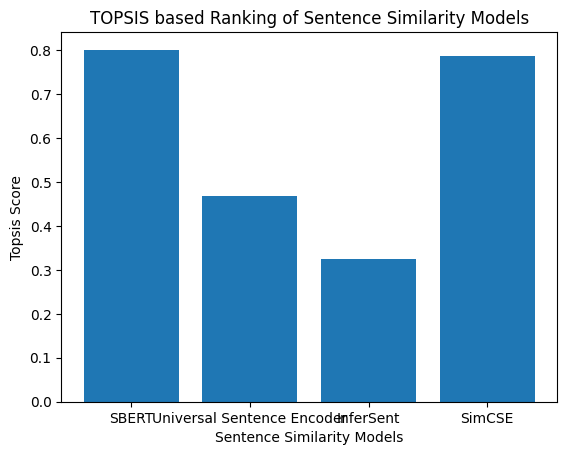

In [6]:
plt.figure()
plt.bar(result["Model"], result["Topsis Score"])
plt.xlabel("Sentence Similarity Models")
plt.ylabel("Topsis Score")
plt.title("TOPSIS based Ranking of Sentence Similarity Models")

plt.savefig("graph.png", dpi=300, bbox_inches="tight")
plt.show()
